In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#import DataFrame and skip first 2 rows
df = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/12_1_2023 11x11/dataset/condensed_data.csv')

In [ ]:
df.head()

A1_sd    A1_mean     A2_sd    A2_mean     A3_sd    A3_mean     A4_sd  \
0  1.059101 -62.666567  1.432222 -61.720167  1.132375 -65.991220  1.399199   
1  1.012605 -63.626311  0.556350 -60.329145  1.208170 -62.020174  1.624997   
2  0.739494 -58.784882  0.458381 -52.711165  1.202186 -59.921177  1.214419   
3  0.595891 -57.134882  1.089669 -54.626870  0.592940 -63.125481  0.827019   
4  1.252765 -64.121796  0.723211 -59.735678  0.573749 -62.609487  1.289662   

     A4_mean  x   y  
0 -63.229783  3   9  
1 -64.624639  8   8  
2 -63.809982  6   4  
3 -60.497260  3   3  
4 -64.541402  8  10

In [ ]:
import pandas as pd

# Create an empty dictionary to store DataFrames
x_y_results = {}

for x_value in range(11):
    # Filter the DataFrame for the current value of x
    row_x = df[df['x'] == x_value]

    # Create an empty dictionary to store results for this x
    x_results = {}

    for y_value in row_x['y'].unique():
        # Filter the data for the current value of y within the current x
        row_x_y = row_x[row_x['y'] == y_value]

        # Group the data by 'y' and calculate the mean for each A#
        result = row_x_y.groupby('y').agg({'A1_mean': 'mean', 'A2_mean': 'mean', 'A3_mean': 'mean', 'A4_mean': 'mean'}).reset_index()

        # Store the result DataFrame in the x_results dictionary with y_value as the key
        x_results[y_value] = result

    # Store the x_results dictionary in the x_y_results dictionary with x_value as the key
    x_y_results[x_value] = x_results


# Create an empty list to store DataFrames
result_dataframes = []

for x_value, x_results in x_y_results.items():
    for y_value, result in x_results.items():
        # Add 'x' and 'y' columns to the result DataFrame
        result['x'] = x_value
        result['y'] = y_value

        # Append the modified result DataFrame to the list
        result_dataframes.append(result)

# Concatenate all the DataFrames in the list into a single DataFrame
final_result = pd.concat(result_dataframes, ignore_index=True)

# Reorder the columns if needed
final_result = final_result[['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean', 'x', 'y']]
final_result

A1_mean    A2_mean    A3_mean    A4_mean   x   y
0   -56.022703 -59.641346 -67.099595 -59.748974   0   3
1   -53.278675 -61.615717 -67.395891 -32.666996   0   1
2   -64.216226 -61.286213 -67.539179 -62.600498   0  10
3   -59.069940 -59.621194 -67.377667 -53.674162   0   5
4   -63.534428 -60.747074 -65.111359 -62.014289   0   8
..         ...        ...        ...        ...  ..  ..
116 -64.735667 -58.878422 -53.903064 -66.361150  10   1
117 -63.888766 -61.350977 -54.531651 -62.781116  10   5
118 -63.126904 -63.102833 -55.814965 -67.194444  10   2
119 -64.382372 -61.453774 -55.849928 -61.571421  10   4
120 -63.108234 -62.824670 -54.956631 -66.142769  10   0

[121 rows x 6 columns]

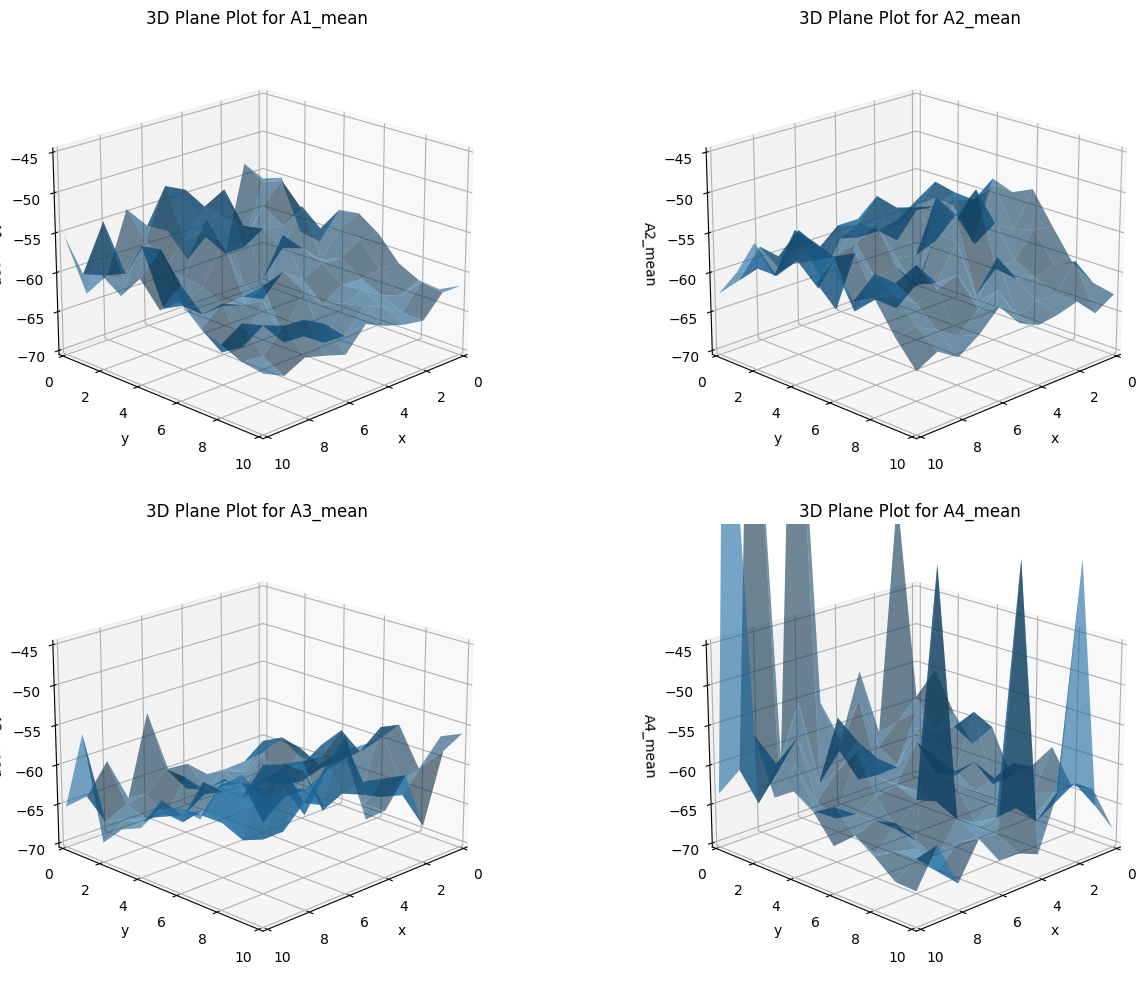

In [ ]:
# Create a 2x2 grid of 3D scatter plots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(15, 10))

for i, a_column in enumerate(['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean']):
    ax = axs[i // 2, i % 2]

    # Extract data for x, y, and z
    x = final_result['x']
    y = final_result['y']
    z = final_result[a_column]

    # Create a grid of x, y values
    x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))

    # Reshape the z values to match the shape of the grid
    z_plane = z.values.reshape(x_grid.shape)

    # Plot the surface (plane)
    ax.plot_surface(x_grid, y_grid, z_plane, alpha=0.6)

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(a_column)
    ax.set_title(f'3D Plane Plot for {a_column}')

    # Set axis ranges for x and y
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(-70,-45)

    ax.view_init(elev=20, azim=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

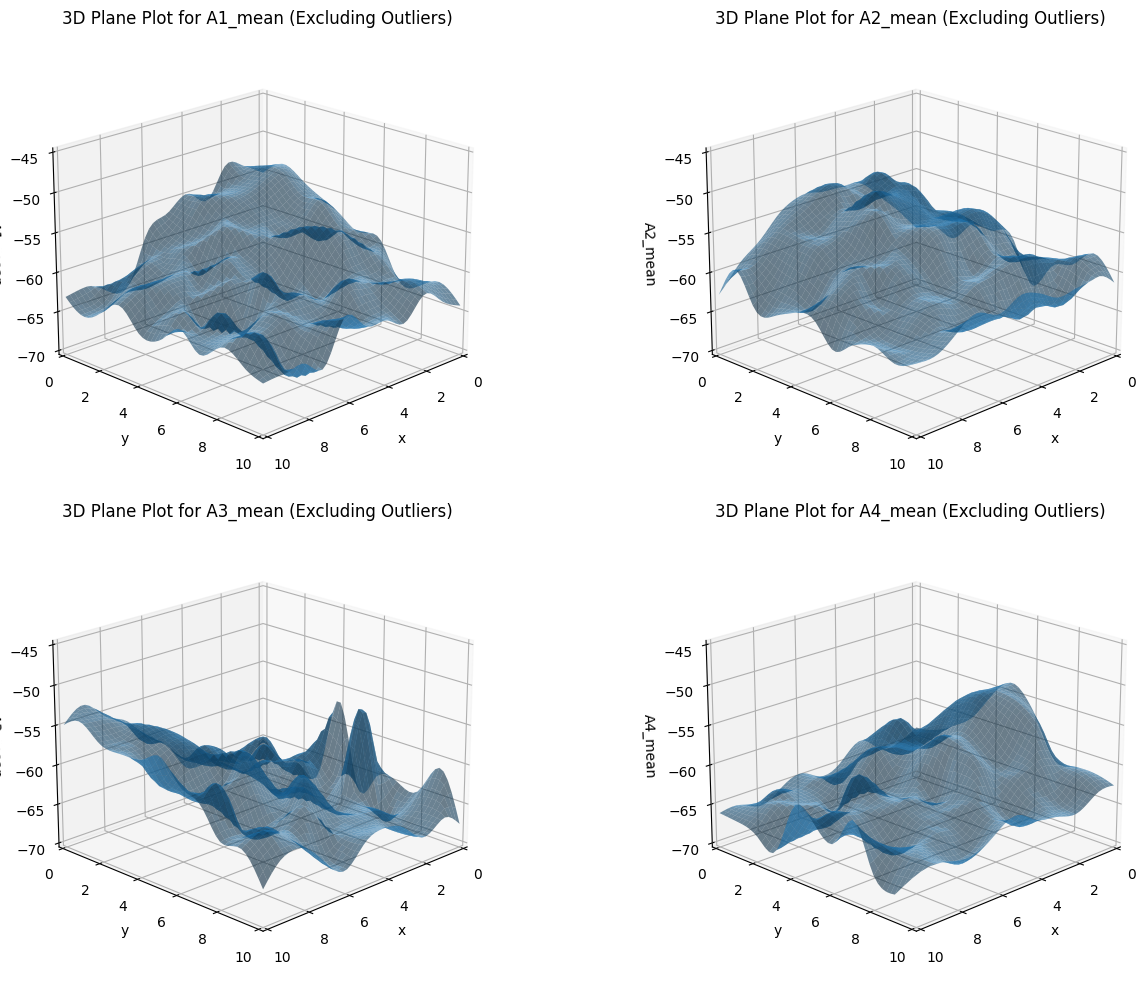

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata
import pandas as pd


# Define an outlier threshold (adjust as needed)
outlier_threshold = 2.34  # Example threshold value

# Create a 2x2 grid of 3D scatter plots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(15, 10))

for i, a_column in enumerate(['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean']):
    ax = axs[i // 2, i % 2]

    # Extract data for x, y, and z
    x = final_result['x']
    y = final_result['y']
    z = final_result[a_column]

    # Calculate the z threshold for excluding outliers
    z_threshold = z.mean() + outlier_threshold * z.std()

    # Filter the data to exclude outliers
    x_filtered = x[z <= z_threshold]
    y_filtered = y[z <= z_threshold]
    z_filtered = z[z <= z_threshold]

    # Perform interpolation to create a new grid and interpolate z values
    grid_x, grid_y = np.meshgrid(np.linspace(min(x), max(x), 50),
                                 np.linspace(min(y), max(y), 50))
    grid_z = griddata((x_filtered, y_filtered), z_filtered, (grid_x, grid_y), method='cubic')

    # Plot the surface (plane) for the filtered data
    ax.plot_surface(grid_x, grid_y, grid_z, alpha=0.6)

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(a_column)
    ax.set_title(f'3D Plane Plot for {a_column} (Excluding Outliers)')

    # Set axis ranges for x and y
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(-70,-45)

    ax.view_init(elev=20, azim=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


<ipython-input-194-486904b184b8>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(a_columns))


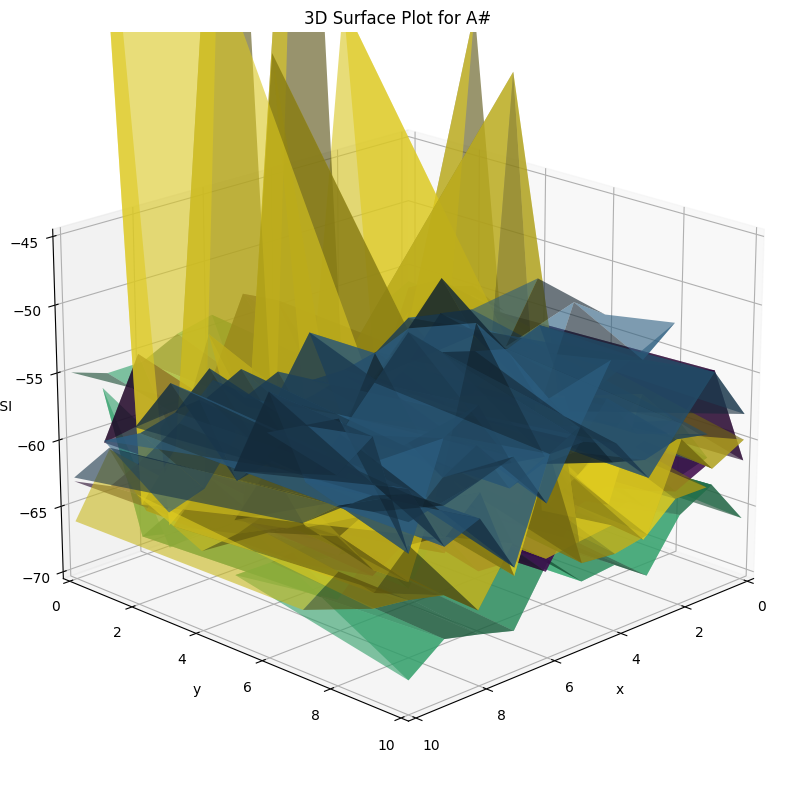

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# List of A# columns
a_columns = ['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean']

# Define a colormap for different A# colors
colormap = plt.cm.get_cmap('viridis', len(a_columns))

for idx, a_column in enumerate(a_columns):
    # Extract data for x, y, and z for the current A#
    x = final_result['x']
    y = final_result['y']
    z = final_result[a_column]

    # Get the color based on the current A# index
    color = colormap(idx / len(a_columns))

    # Create a grid of x, y values
    x_grid, y_grid = np.meshgrid(x.unique(), y.unique())

    # Reshape the z values to match the shape of the grid
    z_plane = z.values.reshape(x_grid.shape)

    # Plot the surface (plane)
    ax.plot_surface(x_grid, y_grid, z_plane, color=color, alpha=0.6)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI')
ax.set_title('3D Surface Plot for A#')
# Set axis ranges for x and y
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(-70,-45)

# Set the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)  # Adjust the angles as needed

# Show the plot
plt.show()


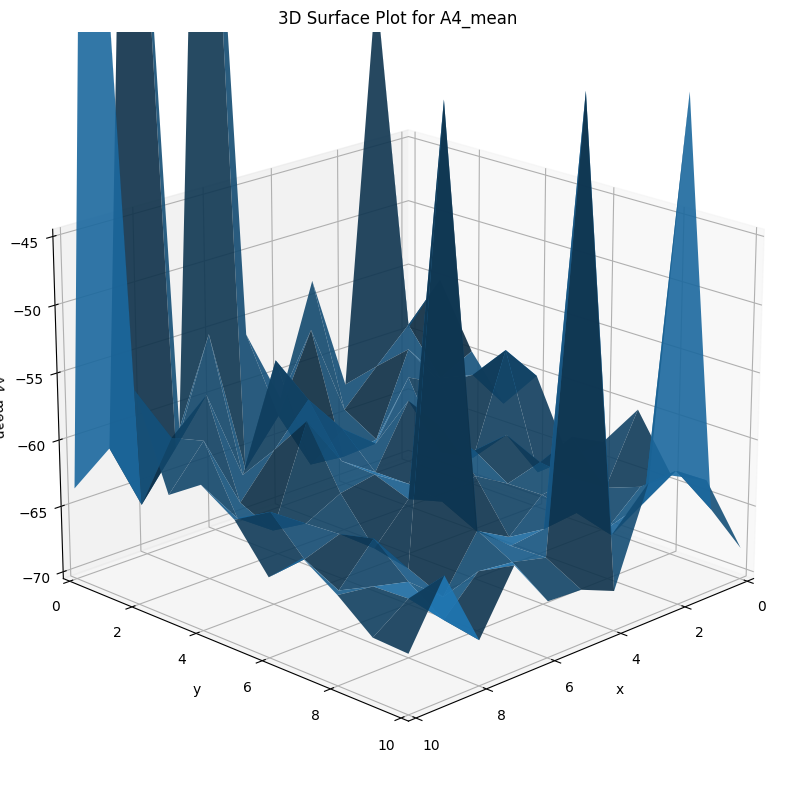

In [ ]:
# Convert the dictionary to a DataFrame for easier manipulation
final_result = pd.DataFrame(final_result)

# Create a 3D plot for only A4_mean
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Extract data for x, y, and z for A4_mean
x = final_result['x']
y = final_result['y']
z = final_result['A4_mean']

# Create a grid of x, y values
x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))

# Reshape the z values to match the shape of the grid
z_plane = z.values.reshape(x_grid.shape)

# Plot the surface (plane)
ax.plot_surface(x_grid, y_grid, z_plane, alpha=0.9)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('A4_mean')
ax.set_title('3D Surface Plot for A4_mean')
# Set axis ranges for x and y
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(-70,-45)

# Set the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)

# Show the plot
plt.show()

<ipython-input-128-a2ec319fcf64>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(a_columns))


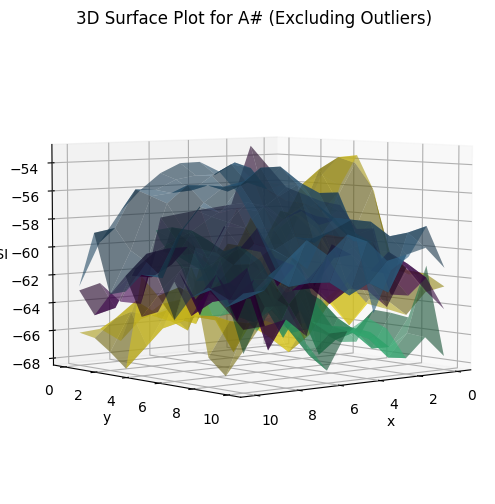

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Define an outlier threshold (adjust as needed)
outlier_threshold = 2.0  # Example threshold value

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# List of A# columns
a_columns = ['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean']

# Define a colormap for different A# colors
colormap = plt.cm.get_cmap('viridis', len(a_columns))

for idx, a_column in enumerate(a_columns):
    # Extract data for x, y, and z for the current A#
    x = final_result['x']
    y = final_result['y']
    z = final_result[a_column]

    # Calculate the z threshold for excluding outliers
    z_threshold = z.mean() + outlier_threshold * z.std()

    # Filter the data to exclude outliers
    x_filtered = x[z <= z_threshold]
    y_filtered = y[z <= z_threshold]
    z_filtered = z[z <= z_threshold]

    # Create a new grid of x, y values based on the original grid
    x_grid, y_grid = np.meshgrid(x.unique(), y.unique())

    # Perform interpolation to create a new grid and interpolate z values
    grid_x, grid_y = np.meshgrid(np.linspace(min(x_grid.ravel()), max(x_grid.ravel()), 11),
                                 np.linspace(min(y_grid.ravel()), max(y_grid.ravel()), 11))

    grid_z = griddata((x_filtered, y_filtered), z_filtered, (grid_x, grid_y), method='cubic')

    # Plot the surface (plane) for the filtered data
    color = colormap(idx / len(a_columns))
    ax.plot_surface(grid_x, grid_y, grid_z, color=color, alpha=0., label=a_column)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI')
ax.set_title('3D Surface Plot for A# (Excluding Outliers)')

# Set the viewing angle (elevation and azimuth)
ax.view_init(elev=5, azim=50)  # Adjust the angles as needed

# Show the plot
plt.show()


<ipython-input-192-22c6dad07672>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(a_columns))


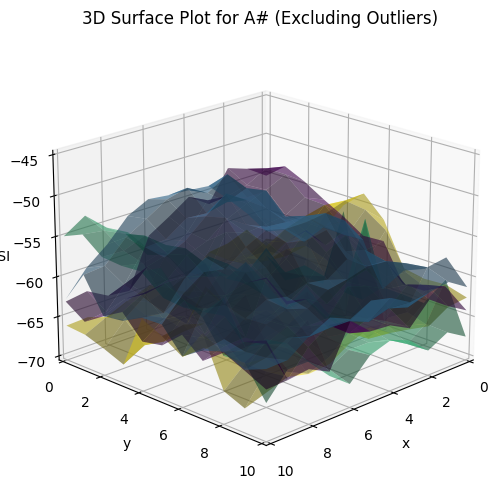

['A1_mean (Outliers: 1)',
 'A2_mean (Outliers: 1)',
 'A3_mean (Outliers: 1)',
 'A4_mean (Outliers: 7)']

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Define an outlier threshold (adjust as needed)
outlier_threshold = 2.34 # Example threshold value

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Lists to store outlier information for each A#
a_columns = ['A1_mean', 'A2_mean', 'A3_mean', 'A4_mean']
outlier_info = []

# Define a colormap for different A# colors
colormap = plt.cm.get_cmap('viridis', len(a_columns))

for idx, a_column in enumerate(a_columns):
    # Extract data for x, y, and z for the current A#
    x = final_result['x']
    y = final_result['y']
    z = final_result[a_column]

    # Calculate the z threshold for excluding outliers
    z_threshold = z.mean() + outlier_threshold * z.std()

    # Filter the data to exclude outliers
    x_filtered = x[z <= z_threshold]
    y_filtered = y[z <= z_threshold]
    z_filtered = z[z <= z_threshold]

    # Count the number of outliers
    num_outliers = len(x) - len(x_filtered)

    # Store outlier information for the legend
    outlier_info.append(f'{a_column} (Outliers: {num_outliers})')

    # Create a new grid of x, y values based on the original grid
    x_grid, y_grid = np.meshgrid(x.unique(), y.unique())

    # Perform interpolation to create a new grid and interpolate z values
    grid_x, grid_y = np.meshgrid(np.linspace(min(x_grid.ravel()), max(x_grid.ravel()), 11),
                                 np.linspace(min(y_grid.ravel()), max(y_grid.ravel()), 11))

    grid_z = griddata((x_filtered, y_filtered), z_filtered, (grid_x, grid_y), method='cubic')

    # Plot the surface (plane) for the filtered data
    color = colormap(idx / len(a_columns))
    ax.plot_surface(grid_x, grid_y, grid_z, color=color, alpha=0.6)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI')
ax.set_title('3D Surface Plot for A# (Excluding Outliers)')
# Set axis ranges for x and y
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(-70,-45)

# Set the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)  # Adjust the angles as needed

# Show the plot
plt.show()
outlier_info

In [ ]:
outlier_info

['A1_mean (Outliers: 4)',
 'A2_mean (Outliers: 2)',
 'A3_mean (Outliers: 3)',
 'A4_mean (Outliers: 7)']